In [38]:
# install package
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [39]:
path = "original.png"
origin_img = cv2.imread(path)

In [40]:
# define court size
width = 1800
height = 900

In [41]:
cp_origin = []

In [42]:
def click(event, x, y, flags, params):
    global cp_origin
    if event == cv2.EVENT_LBUTTONDOWN:
        cp_origin.append([x,y])
        print(x, y)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cp_origin = []
        print("clear")

In [43]:
# Click on corners of the court in the order of TL, BL, BR, TR.
#  can be 
cv2.imshow("window1", origin_img)
cv2.setMouseCallback("window1", click)
cv2.waitKey(0)
cv2.destroyAllWindows()

clear
256 192
34 840
1865 831
1626 206


In [48]:
# TL BL BR TR
cp_origin = np.float32(cp_origin)
cp_trans = np.float32([[0,0], [0, height], [width, height], [width, 0]])
print(cp_origin)

[[ 256.  192.]
 [  34.  840.]
 [1865.  831.]
 [1626.  206.]]


In [47]:
M = cv2.getPerspectiveTransform(cp_origin, cp_trans)
trans_img = cv2.warpPerspective(origin_img, M, (width, height))
print(M)

[[ 1.39689864e+00  4.78567128e-01 -4.49490941e+02]
 [-2.09565205e-02  2.05074522e+00 -3.88378214e+02]
 [-3.16601102e-05  5.74740809e-04  1.00000000e+00]]


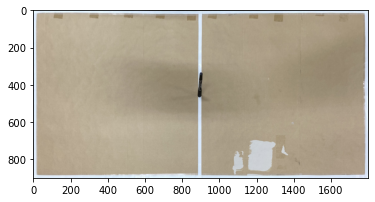

In [46]:
# cv2 : BGR
# matplotlib : RGB
plot_img = cv2.cvtColor(trans_img, cv2.COLOR_BGR2RGB)
plt.imshow(plot_img)